In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import colors as c
from matplotlib import gridspec as grid

from sklearn.model_selection import train_test_split
from sklearn import metrics


In [6]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df= pd.read_csv('heart_2020_cleaned.csv')

In [8]:
df[["HeartDisease"]].value_counts()

HeartDisease
No              292422
Yes              27373
dtype: int64

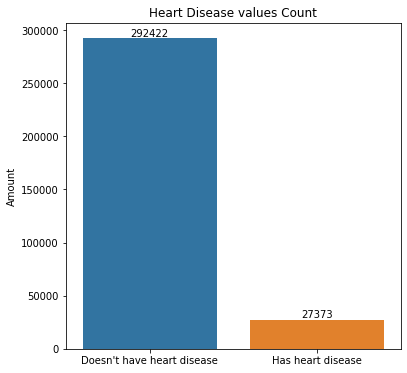

In [10]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x =["Doesn't have heart disease", 'Has heart disease'],y = df["HeartDisease"].value_counts().tolist(), data = df)
ax.bar_label(container =ax.containers[0])
ax.set_ylabel('Amount')
ax.set_title('Heart Disease values Count')
plt.show()

In [11]:
ax.containers

[<BarContainer object of 2 artists>]

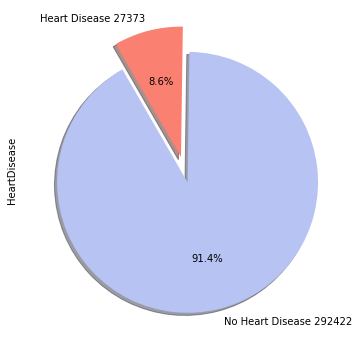

In [12]:
plt.figure(figsize=(6,6))
labs=['No Heart Disease','Heart Disease']
labs2 =df['HeartDisease'].value_counts().astype('string').tolist()
df['HeartDisease'].value_counts().plot.pie(startangle = 120,labels =[labs[i] +' '+ labs2[i] for i in range(len(labs))],autopct='%1.1f%%',colors=['#B7C3F3','salmon'],shadow=True, explode=[0.1,0.1])
plt.show()


In [14]:
df['Smoking'].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

**BMI and Heart Disease Comparison**

<Figure size 1440x720 with 0 Axes>

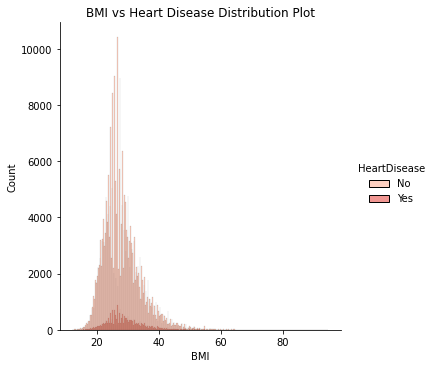

In [36]:
plt.figure(figsize=(20,10))
sns.displot(x='BMI', hue='HeartDisease', data=df, palette='Reds') # hue heart disease
plt.title('BMI vs Heart Disease Distribution Plot')
plt.show()

In [38]:
class VizData:
    def __init__(self, df, ccol, ft_1, ft_2):
        if type(df) == pd.core.frame.DataFrame \
            and ccol in df.columns \
            and type(ft_1) == type(ft_2) == str:
            self.df = df
            self.ft1 = ft_1
            self.ft2 = ft_2
            self.ccol = ccol
        
    # Visualisation for columns with binary values
    def binviz(self, col, idx,
                  heat_title,
                  don_all_labels, don_all_title= "Main Pie Chart",
                  don_one_title= "Pie Chart 1",
                  don_two_title= "Pie Chart 2",
                  fig_size= (9, 7),
                  binv= ["No", "Yes"]):
        if col in self.df.columns \
                and self.df[col].nunique() == 2 \
                and isinstance(idx, list) \
                and len(idx) == 2 \
                and isinstance(fig_size, tuple) \
                and len(fig_size) == 2 \
                and all(isinstance(k, int) and k > 0 for k in fig_size) \
                and isinstance(don_all_labels, list) \
                and all(isinstance(lab, str) for lab in don_all_labels) \
                and len(don_all_labels) == 4 \
                and all(isinstance(tit, str)
                        for tit in [heat_title,
                                    don_all_title,
                                    don_one_title,
                                    don_two_title]
                       ):
            sns.set_style("dark")
            m_row, n_col = 2, 2
            fig = plt.figure(figsize= (n_col * fig_size[0], m_row * fig_size[1]))
            gs = fig.add_gridspec(m_row, n_col)
            ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)]
                  for i in range(m_row)]
            
            # heatmap
            heat_df = pd.DataFrame(
                                    {self.ft1: [len(self.df[(self.df[self.ccol] == "Yes")
                                                            & (self.df[col] == binv[1])]),
                                                len(self.df[(self.df[self.ccol] == "Yes")
                                                            & (self.df[col] == binv[0])])
                                               ],
                                     self.ft2: [len(self.df[(self.df[self.ccol] == "No")
                                                            & (self.df[col] == binv[1])]),
                                                len(self.df[(self.df[self.ccol] == "No")
                                                            & (self.df[col] == binv[0])])
                                               ]
                                    }, index= idx)
            ax_00 = sns.heatmap(heat_df, linewidth= 0.1,
                                annot= True, fmt= "d",
                                cmap= "Reds", ax= ax[0][0])
            ax_00.set_title(heat_title, pad= 12)
            
            # Donut Chart All
            don_all_list = [x for x in (list(heat_df[self.ft1]) + list(heat_df[self.ft2]))]
            ax_01 = ax[0][1]
            ax_01.pie(don_all_list, explode= (0.1, 0.1, 0, 0),
                      labels= don_all_labels,
                      autopct= "%1.1f%%",
                      colors= ["pink", "lightgreen", "lightblue", "turquoise"])
            ax_01.set(title= don_all_title)
            cir_01 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_01.add_patch(cir_01)
            
            # Donut Chart 1
            don_one_list = list(heat_df.T[idx[0]])
            ax_10 = ax[1][0]
            ax_10.pie(don_one_list, explode= (0.1, 0),
                      labels= [self.ft1, self.ft2],
                      autopct= "%1.1f%%",
                      colors= ["salmon", "pink"])
            ax_10.set(title= don_one_title)
            cir_10 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_10.add_patch(cir_10)
            
            # piechart 2
            don_two_list = list(heat_df[self.ft1])
            ax_11 = ax[1][1]
            ax_11.pie(don_two_list, explode= (0.1, 0),
                      labels= idx,
                      autopct= "%1.1f%%",
                      colors= ["salmon", "pink"])
            ax_11.set(title= don_two_title)
            cir_11 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_11.add_patch(cir_11)
            
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
            plt.show()
        
    # Visualisation for columns with numeric values
    def numviz(self, col, d1_labs, d2_labs, d1_div, d2_div,
               d1_colors, d2_colors,
               xlim_1, xlim_2,
               hist_binwidth= 5,
               h1_tit= "Histogram 1", h2_tit= "Histogram 2",
               d1_tit= "Donut Chart 1", d2_tit= "Donut Chart 2",
               fig_size= (10, 8)
              ):
        if col in self.df.columns \
                and self.df[col].dtype in [int, float] \
                and all(isinstance(labs, list)
                        and all(isinstance(l, str) for l in labs)
                        for labs in [d1_labs, d2_labs]) \
                and all(isinstance(div, list)
                        and all(isinstance(d, float) or isinstance(d, int)
                                for d in div)
                        for div in [d1_div, d2_div]
                       ) \
                and len(d1_labs) == len(d1_div) + 1 \
                and len(d2_labs) == len(d2_div) + 1 \
                and all(isinstance(xl, tuple) and all(isinstance(x, int)
                                                      for x in xl)
                        for xl in [xlim_1, xlim_2]) \
                and isinstance(hist_binwidth, int) and hist_binwidth > 0 \
                and all(isinstance(tit, str)
                        for tit in [h1_tit, h2_tit, d1_tit, d2_tit]
                       ):
            sns.set_style("dark")
            m_row, n_col = 2, 2
            fw, fd = fig_size
            fig= plt.figure(figsize= (n_col * fw, m_row * fd))
            gs = fig.add_gridspec(m_row, n_col)
            ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)]
                  for i in range(m_row)]
            
            # Histogram 1
            h1_data = self.df[(self.df[self.ccol] == "Yes")][col]
            ax_00 = sns.histplot(x= h1_data, binwidth= hist_binwidth,
                                 color= "red",
                                 ax= ax[0][0])
            ax_00.set_title(h1_tit, pad= 12)
            ax_00.set(ylabel= "Count", xlim= xlim_1)
            
            # Donut Chart 1
            d1_divmod = [0] + d1_div + [self.df[(self.df[self.ccol] == "Yes")][col].max()]
            d1_data = [len(self.df[(self.df[self.ccol] == "Yes")
                                   & (d1_divmod[k] <= self.df[col])
                                      & (self.df[col] < d1_divmod[k + 1])]
                          )
                       for k in range(len(d1_divmod) - 2)] \
                       + [len(self.df[(self.df[self.ccol] == "Yes")
                                      & (self.df[col] >= d1_div[-1])])]
            ax_01 = ax[0][1]
            ax_01.pie(d1_data, labels= d1_labs, autopct= "%1.1f%%", colors= d1_colors)
            ax_01.set(title= d1_tit)
            cir_01 = plt.Circle((0, 0), 0.35, fc= "white")
            ax_01.add_patch(cir_01)
            
            # Histogram 2
            h2_data = self.df[(self.df[self.ccol] == "No")][col]
            ax_10 = sns.histplot(x= h2_data, binwidth= hist_binwidth,
                                 color= "Yellow",
                                 ax= ax[1][0])
            ax_10.set_title(h2_tit, pad= 12)
            ax_10.set(ylabel= "Count", xlim= xlim_2)
            
            # Donut 2
            d2_divmod = [0] + d2_div + [self.df[(self.df[self.ccol] == "No")][col].max()]
            d2_data = [len(self.df[(self.df[self.ccol] == "No")
                                   & ((d2_divmod[k] <= self.df[col])
                                      & (self.df[col] < d2_divmod[k + 1]))]
                          )
                       for k in range(len(d2_divmod) - 2)] \
                       + [len(self.df[(self.df[self.ccol] == "No")
                                      & (self.df[col] >= d2_div[-1])])]
            ax_11 = ax[1][1]
            ax_11.pie(d2_data, labels= d2_labs, autopct= "%1.1f%%", colors= d2_colors)
            ax_11.set(title= d2_tit)
            cir_11 = plt.Circle((0, 0), 0.35, fc= "white")
            ax_11.add_patch(cir_11)
            
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
            plt.show()

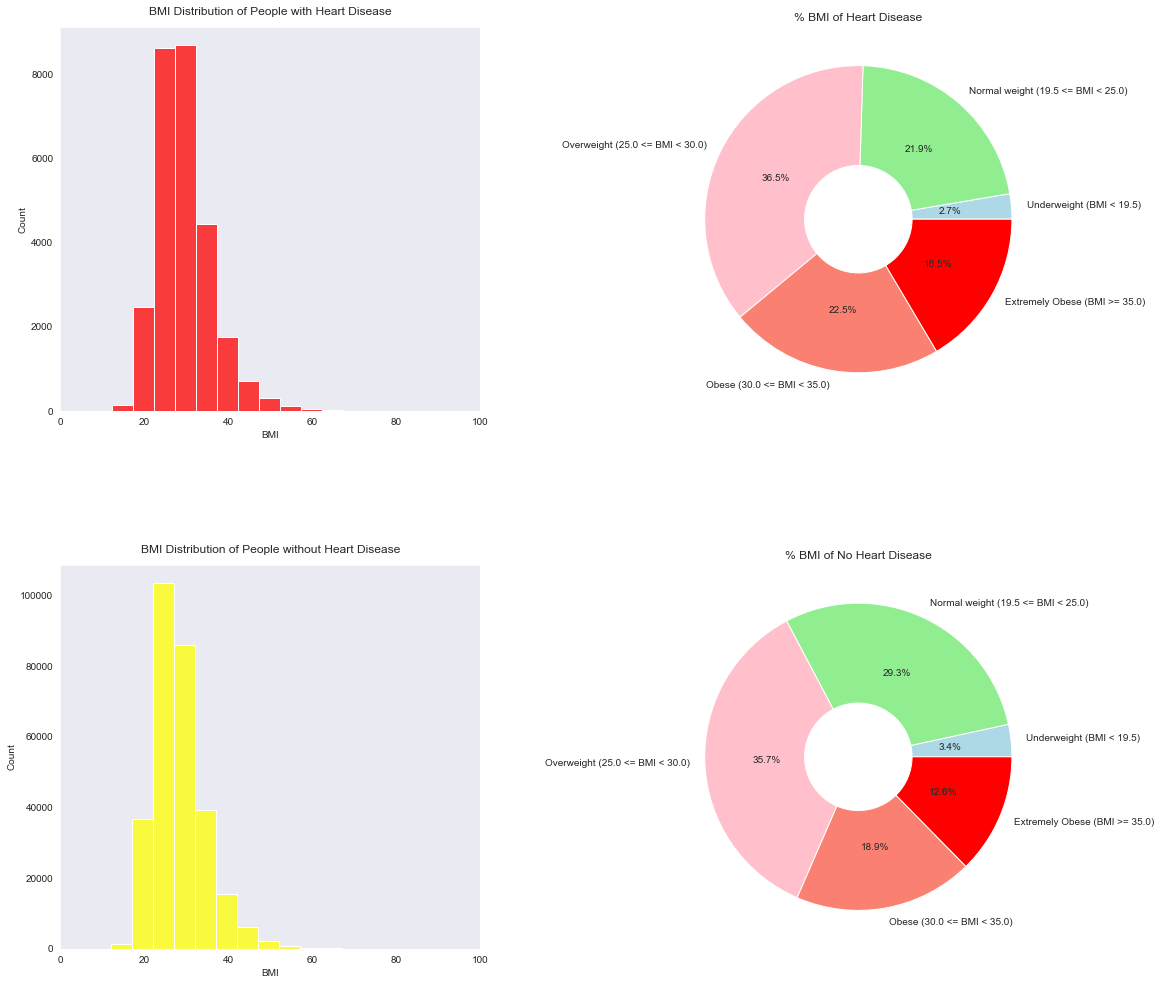

In [39]:
observ = VizData(df, "HeartDisease", "With Heart Disease", "Without Heart Disease")
bmi_labs = ['Underweight (BMI < 19.5)', 'Normal weight (19.5 <= BMI < 25.0)', 'Overweight (25.0 <= BMI < 30.0)', 'Obese (30.0 <= BMI < 35.0)', 'Extremely Obese (BMI >= 35.0)']
bmi_div = [19.5, 25, 30, 35]
observ.numviz("BMI", bmi_labs, bmi_labs, bmi_div, bmi_div,
              ["lightblue", "lightgreen", "pink", "salmon","red"],
              ["lightblue", "lightgreen", "pink", "salmon","red"],
              (0, 100), (0, 100),
              h1_tit= "BMI Distribution of People with Heart Disease",
              h2_tit= "BMI Distribution of People without Heart Disease",
              d1_tit= "% BMI of Heart Disease",
              d2_tit= "% BMI of No Heart Disease"
             )

In [40]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


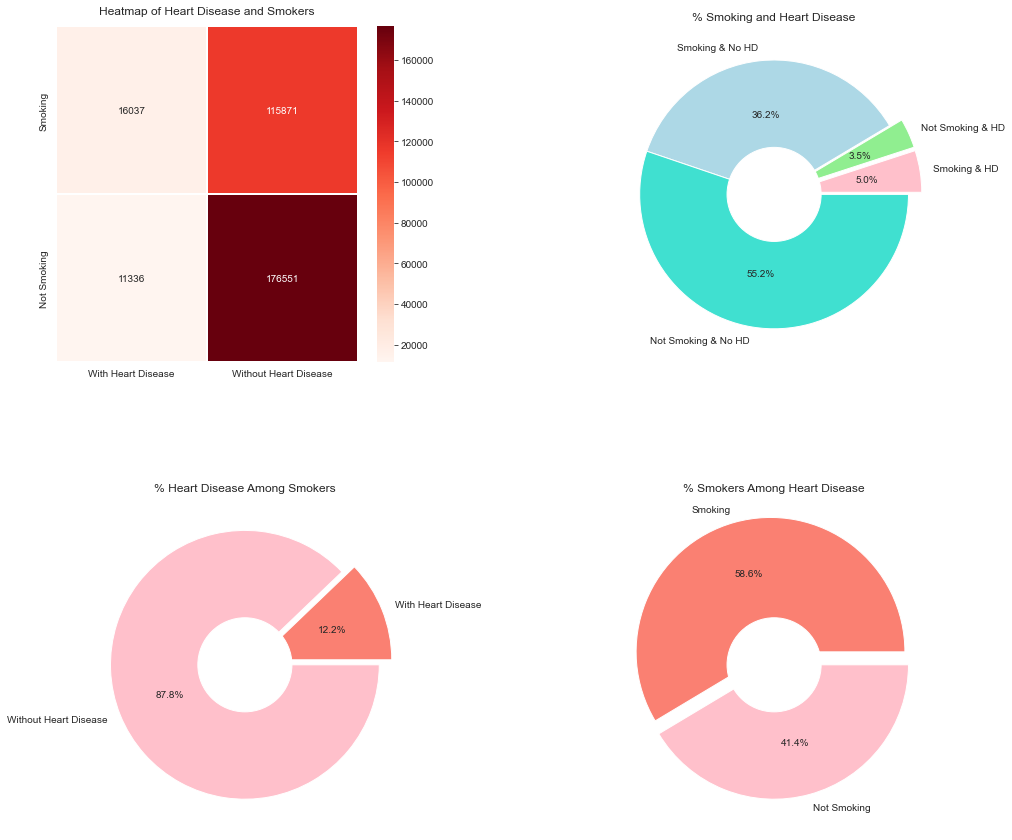

In [41]:
smoking_idx = ["Smoking", "Not Smoking"]
smoking_all_labs = ["Smoking & HD",
                    "Not Smoking & HD",
                    "Smoking & No HD",
                    "Not Smoking & No HD"]
observ.binviz("Smoking", smoking_idx,
              "Heatmap of Heart Disease and Smokers",
              smoking_all_labs,
              don_all_title= "% Smoking and Heart Disease",
              don_one_title= "% Heart Disease Among Smokers",
              don_two_title= "% Smokers Among Heart Disease")

**Asthma And Heart Disease**

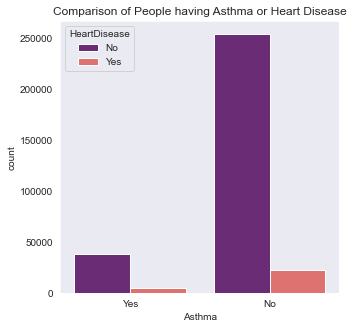

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(x='Asthma', hue='HeartDisease', data=df,palette='magma')
plt.title('Comparison of People having Asthma or Heart Disease')
plt.show()

**Correlation Between Features**

In [43]:
df2 = df  #temporary label encoding for correlation plots
categorical_df = df2.select_dtypes(include=['object'])
for i in categorical_df:
    df2[i] = LabelEncoder().fit_transform(df[i])
df2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


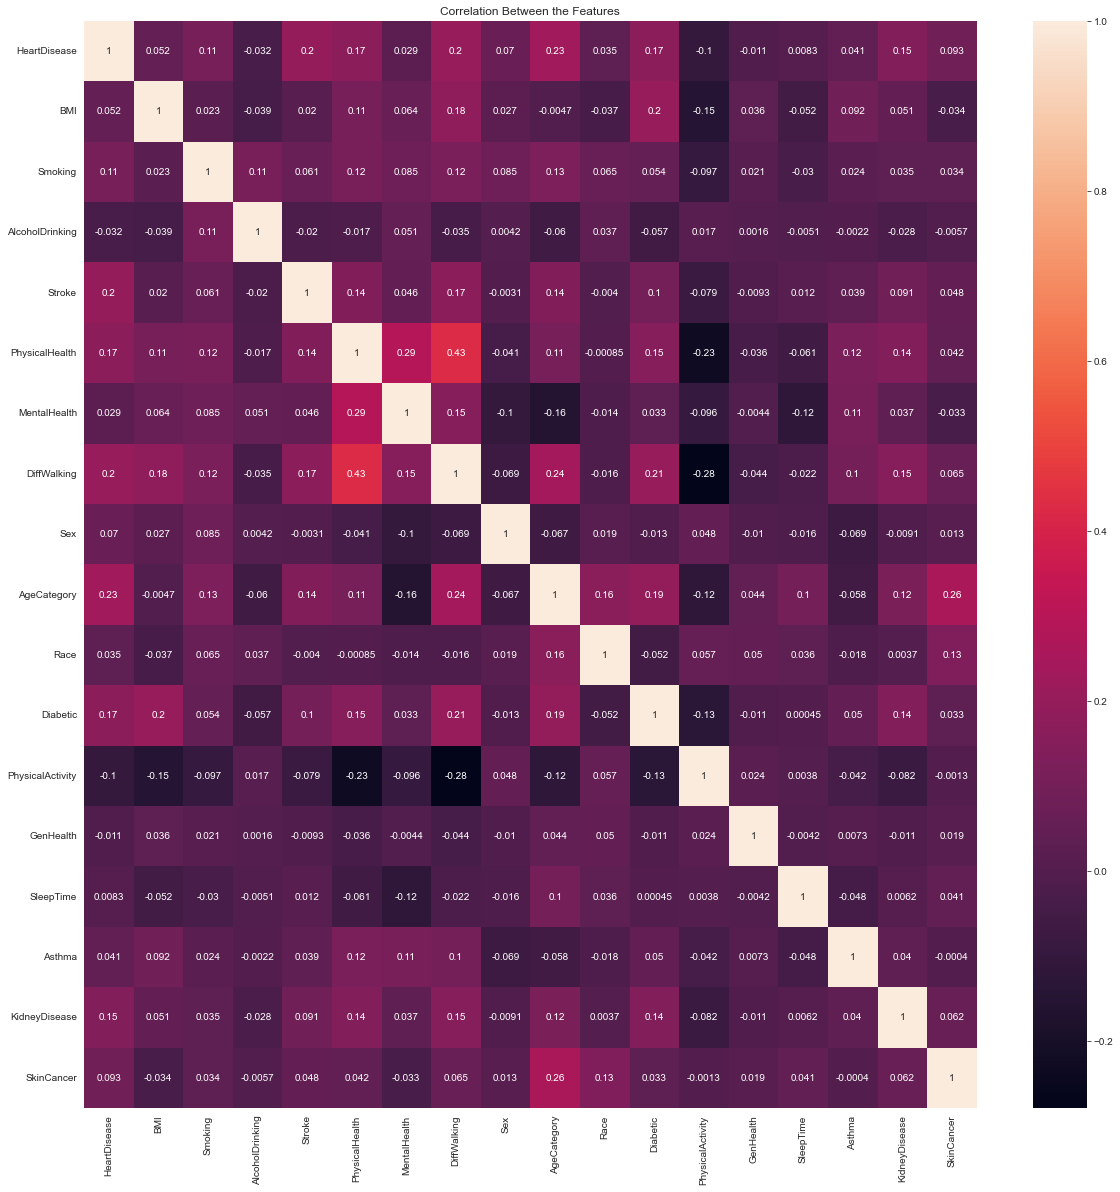

In [45]:
corr_matrix = df2.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Between the Features')
plt.show()

**Visualisation of Correlation of Input Features with Heart Disease**

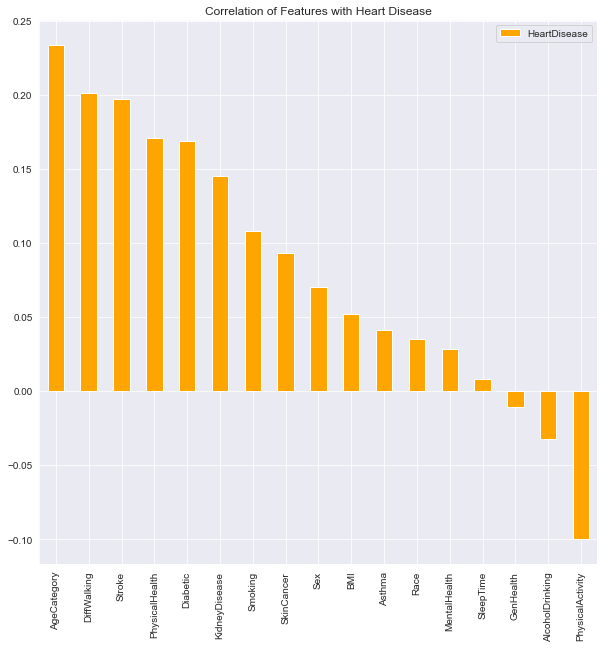

In [46]:
corr = pd.DataFrame(df2.corr()['HeartDisease']).drop('HeartDisease',axis=0).sort_values(by = 'HeartDisease',ascending=False)
corr.plot(kind='bar',grid=True,figsize=(10,10),color='orange')
plt.title('Correlation of Features with Heart Disease')
plt.show()

**Adding the actual BMICategory column for the model**

In [16]:
bins = [0, 19.5, 25, 30, 35, np.inf]
names = ['Underweight (BMI < 19.5)', 'Normal weight (19.5 <= BMI < 25.0)', 'Overweight (25.0 <= BMI < 30.0)', 'Obese (30.0 <= BMI < 35.0)', 'Extremely Obese (BMI >= 35.0)']
df['BMICategory'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI',axis=1,inplace=True)

In [18]:
df['BMICategory'].value_counts()

Overweight (25.0 <= BMI < 30.0)       114355
Normal weight (19.5 <= BMI < 25.0)     92243
Obese (30.0 <= BMI < 35.0)             61169
Extremely Obese (BMI >= 35.0)          41379
Underweight (BMI < 19.5)               10649
Name: BMICategory, dtype: int64

**Label Encoding**

In [19]:
order_cols = ["BMICategory", "AgeCategory", "HeartDisease"]
no_order_cols = [ "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]

# Label encoding
for col in order_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encoding
for col in no_order_cols:
    dummy_col = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy_col], axis=1)
    del df[col]

In [20]:
df.head()

,HeartDisease,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,BMICategory,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,3.0,30.0,7,5.0,4,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,0,0.0,0.0,12,7.0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0,20.0,30.0,9,8.0,3,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3,0,0.0,0.0,11,6.0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,0,28.0,0.0,4,8.0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0


**Mitigating the Imbalanced Data by synthetic over-sampling**

In [21]:
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

In [22]:

from imblearn.over_sampling import SMOTE
over = SMOTE(k_neighbors=2000)
X, Y = over.fit_resample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2022, stratify=Y)

C:\Users\valse\AppData\Local\Temp/ipykernel_16860/364472659.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


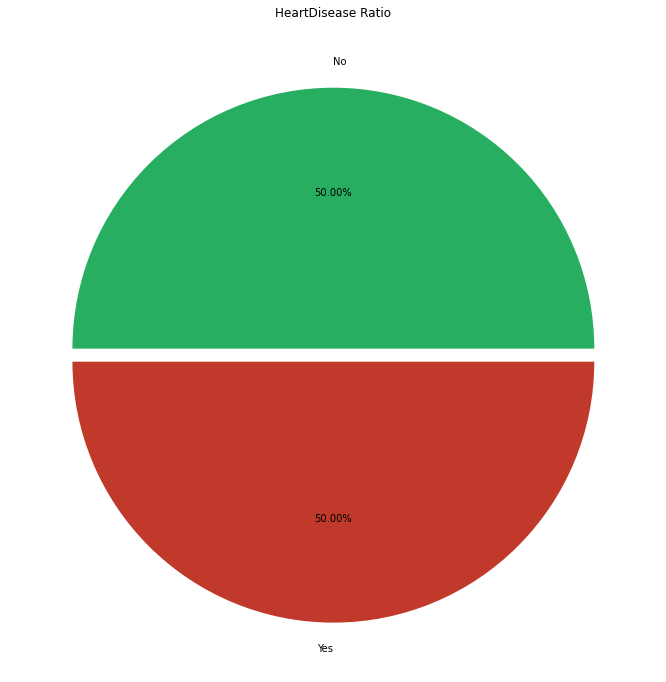

In [25]:
fig, ax = plt.subplots(1, 1,figsize =(15, 12))
ax.pie(Y.value_counts(),autopct='%1.2f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('HeartDisease Ratio')
fig.show()

**Implementation of Logistic Regression model**

In [26]:
from sklearn.linear_model import LogisticRegression

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


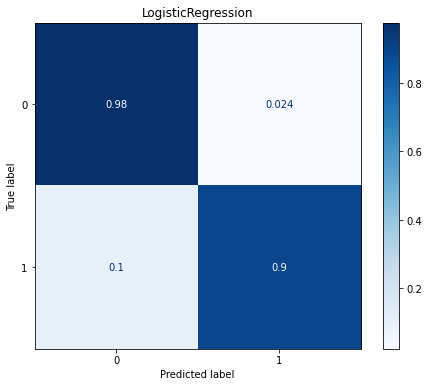

In [27]:
fit = LogisticRegression(random_state=2022).fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("LogisticRegression")
metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
plt.show()


In [34]:
recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100, 2)
print('recall', recall)
precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100, 2)
print('precision', precision)
accuracy = round(metrics.accuracy_score(y_test, fit.predict(X_test))*100, 2)
print('accuracy', accuracy)



recall 89.53
precision 97.43
accuracy 93.59
